In [1]:
import gridgeo


gridgeo.__version__

'1.0.1+5.gd5faa0f.dirty'

In [2]:
url = 'http://crow.marine.usf.edu:8080/thredds/dodsC/FVCOM-Nowcast-Agg.nc'

grid = gridgeo.GridGeo(
    url,
    standard_name='sea_water_potential_temperature'
)

In [3]:
import fiona

schema = {
    'geometry': 'MultiPolygon',
    'properties': {'name': 'str:{}'.format(len(grid.mesh))}
}

with fiona.open('grid.shp', 'w', 'ESRI Shapefile', schema) as f:
    f.write({'geometry': grid.__geo_interface__,
             'properties': {'name': grid.mesh}})

### Methods

In [4]:
[s for s in dir(grid) if not s.startswith('_')]

['geometry',
 'mesh',
 'outline',
 'polygons',
 'save',
 'to_geojson',
 'triang',
 'x',
 'y']

In [5]:
grid.mesh

'ugrid'

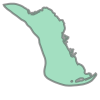

In [6]:
grid.outline

The grid has 98818 polygons, showing the first 5.


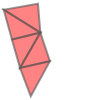

In [7]:
print(f'The grid has {len(grid.geometry)} polygons, showing the first 5.')

grid.geometry[:5]

### Displaying all the polygons as vectors can be costly and crash jupyter! Let's make a raster representation of them using cartopy instead.

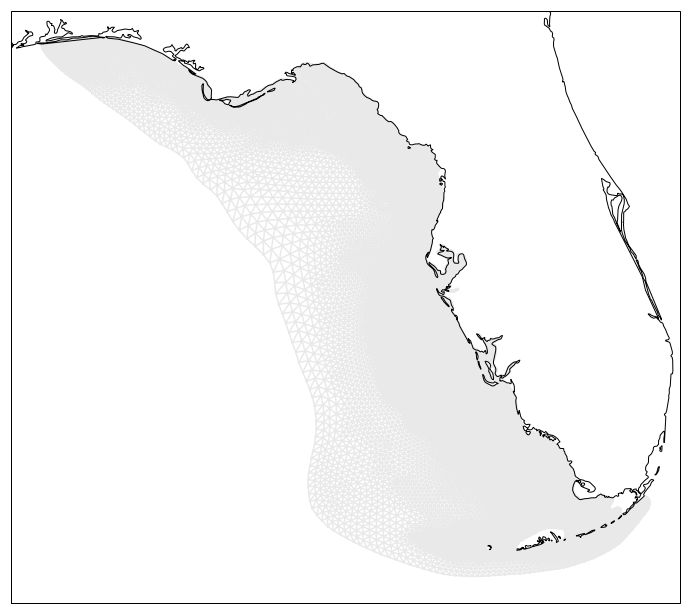

In [8]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(
    figsize=(12, 12),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

kw = dict(linestyle='-', alpha=0.25, color='darkgray')
ax.triplot(grid.triang, **kw)
ax.coastlines(resolution='10m');

### `to_geojson()` method returns a styled geojson-like `dict`

See https://github.com/mapbox/simplestyle-spec/tree/master/1.1.0 for styling options.

In [9]:
kw = {
    'fill': '#fd7d11',
    'fill_opacity': 0.2,
    'stroke_opacity': 1,
    'float_precision': 2,
}

geojson = grid.to_geojson(**kw)
geojson['properties']

{'description': '',
 'fill': '#fd7d11',
 'fill-opacity': 0.6,
 'marker-color': '7e7e7e',
 'marker-size': 'medium',
 'marker-symbol': '',
 'stroke': '555555',
 'stroke-opacity': 1,
 'stroke-width': 2,
 'title': 'ugrid'}

### or just use the `__geo_interface__`.

In [10]:
grid.__geo_interface__.keys()

dict_keys(['type', 'coordinates'])

### Saving the grid to as geojson file

In [11]:
grid.save('grid.geojson', **kw)

### shapefile

In [12]:
grid.save('grid.shp')

### or just plot using folium ;-)

In [13]:
import folium


x, y = grid.outline.centroid.xy

m = folium.Map(location=[y[0], x[0]])
folium.GeoJson(grid.outline.__geo_interface__).add_to(m)
m.fit_bounds(m.get_bounds())

m